##### Headers - Importing all the packages required.

In [115]:
import os, emoji, string
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
import plotly.graph_objects as go
from plotly.offline import iplot
import plotly.express as px
from collections import Counter

In [2]:
%%capture --no-display
Comments = pd.read_csv(r'./UScomments.csv',error_bad_lines=False) # type: ignore
Comments.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


## Performing Sentiment analysis

##### Missing values - is null, and sum will sum up all the missing value fields 

In [3]:
Comments.isnull().sum() # type: ignore

video_id         0
comment_text    25
likes            0
replies          0
dtype: int64

##### Dropping all the missing fields.

In [4]:
Comments.dropna(inplace=True) # type:ignore

In [5]:
TextBlob('trending 😉').sentiment # to access polarity, .polarity

Sentiment(polarity=0.0, subjectivity=0.0)

##### Collecting all the polarities

In [6]:
polarities=[]
for comment in Comments['comment_text']:
    try:
        polarities.append(TextBlob(comment).sentiment.polarity)
    except:
        polarities.append(0)
Comments['polarity']=polarities

## WordCloud of positive and negative sentences

##### Filtering all the positive and negative comments

In [7]:
positive_comments = Comments[Comments['polarity']==1] 
negative_comments = Comments[Comments['polarity']==-1] 

##### Creating WordCloud

Text(0.5, 1.0, 'Positive Comments')

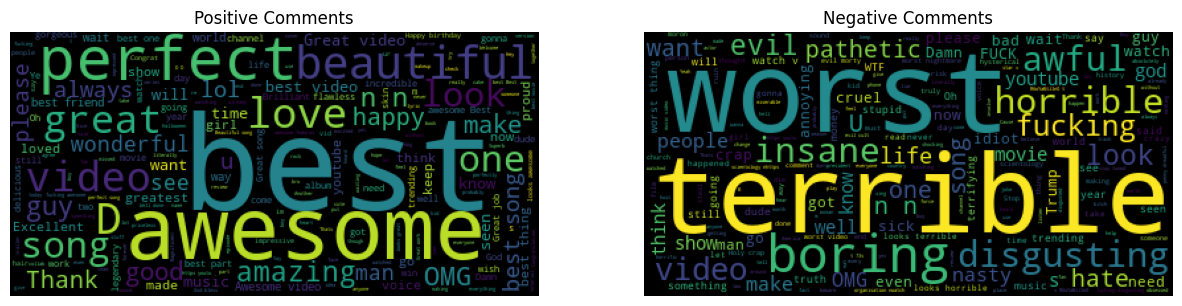

In [70]:
total_negative_comments = ' '.join(negative_comments['comment_text'])
negative_wordcloud=WordCloud(stopwords=set(STOPWORDS)).generate(total_negative_comments)

total_positive_comments = ' '.join(positive_comments['comment_text'])
positive_wordcloud=WordCloud(stopwords=set(STOPWORDS)).generate(total_positive_comments)
fig = plt.figure(figsize=(15, 5))
fig.add_subplot(1, 2, 2)
plt.imshow(negative_wordcloud)
plt.axis('off')
plt.title("Negative Comments")
fig.add_subplot(1, 2, 1)
plt.imshow(positive_wordcloud)
plt.axis('off')
plt.title("Positive Comments")

## Emoji Analysis

##### Extracting Emojis list

In [71]:
L=list(emoji.get_emoji_unicode_dict('en').values())
emoji_list=[]
for comment in Comments[0:10000]['comment_text']:
    for char in comment:
        if char in L:
            emoji_list.append(char)

##### Plotting the bar graph

In [73]:
emojis=[Counter(emoji_list).most_common(10)[i][0] for i in range(10)]
freqs=[Counter(emoji_list).most_common(10)[i][1] for i in range(10)] 
trace=go.Bar(x=emojis,y=freqs)
iplot([trace])

## Collecting Data from Youtube

##### Filtering .json and .csv files

In [72]:
files = os.listdir(r'./additional_data/')
json_files = [files[i] for i in range(1,len(files),2)]
csv_files = [files[i] for i in range(0,len(files),2)]

##### Collecting all files to dataframe

In [32]:
csv_df=pd.DataFrame()
for c in csv_files:
    csv_file_df=pd.read_csv(r'./additional_data/'+c,encoding='iso-8859-1')
    csv_file_df['country']=c.split('.')[0][0:2]
    csv_df=pd.concat([csv_df,csv_file_df])
csv_df.head(4)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,CA
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,CA


## Which category has maximum Likes?

##### extracting the categories from txt file and mapping to original dataframe

In [34]:
csv_df['category_id'].unique()

array([10, 23, 24, 25, 22, 26,  1, 28, 20, 17, 29, 15, 19,  2, 27, 43, 30,
       44], dtype=int64)

In [60]:
%%capture --no-display
categories=pd.read_csv('./category_file.txt',sep=": \\t\\t")
categories.reset_index(inplace=True)
categories.columns=['Category_id','Category_name']
categories.set_index('Category_id',inplace=True)
categories_dictionary = categories.to_dict()['Category_name']
csv_df['category_name'] = csv_df['category_id'].map(categories_dictionary)
csv_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,category_name
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA,Music
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA,Comedy
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,CA,Comedy
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,CA,Entertainment
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,CA,Music


##### Boxplotting using seaborn

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Music'),
  Text(1, 0, 'Comedy'),
  Text(2, 0, 'Entertainment'),
  Text(3, 0, 'News & Politics'),
  Text(4, 0, 'People & Blogs'),
  Text(5, 0, 'Howto & Style'),
  Text(6, 0, 'Film & Animation'),
  Text(7, 0, 'Science & Technology'),
  Text(8, 0, 'Gaming'),
  Text(9, 0, 'Sports'),
  Text(10, 0, 'Nonprofits & Activism'),
  Text(11, 0, 'Pets & Animals'),
  Text(12, 0, 'Travel & Events'),
  Text(13, 0, 'Autos & Vehicles'),
  Text(14, 0, 'Education'),
  Text(15, 0, 'Shows'),
  Text(16, 0, 'Movies'),
  Text(17, 0, 'Trailers')])

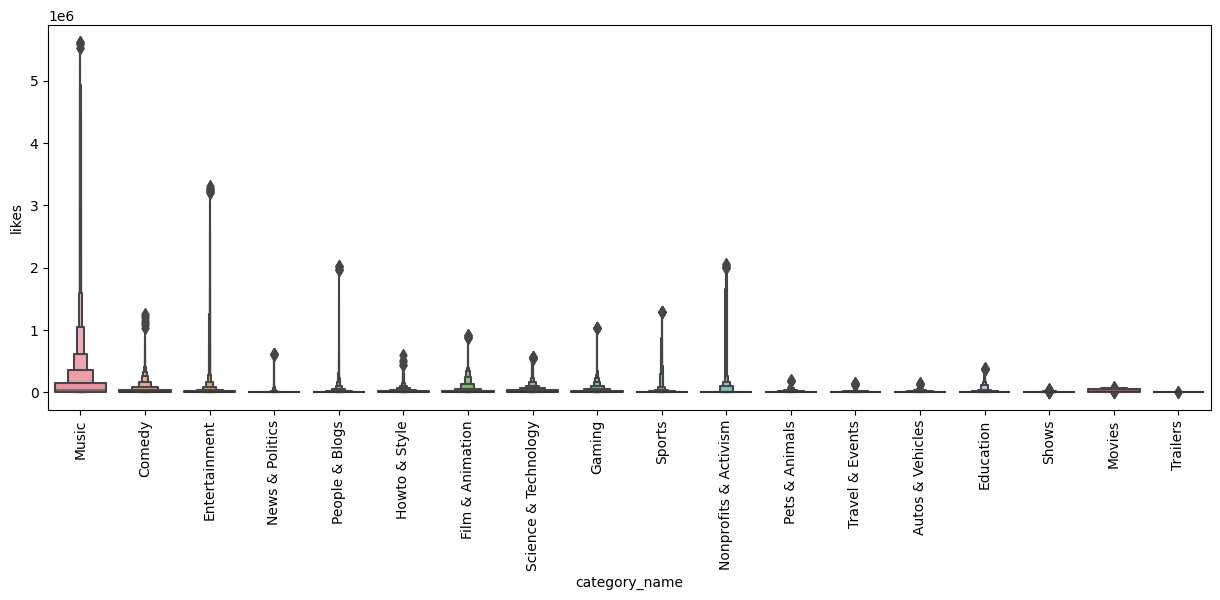

In [74]:
%%capture --no-display
plt.figure(figsize=(15,5))
sns.boxenplot(x='category_name',y='likes',data=csv_df)
plt.xticks(rotation='vertical')

## Finding whether audience is engaged or not
Basically, we need to think of three parameters here for each video
```
- Like Rate
- Dislike Rate
- Comment Rate
```

##### Creating new columns of Dataframe: like_rate, dislike_rate, comment_rate

In [ ]:
csv_df['like_rate']=(csv_df['likes']/csv_df['views'])*100
csv_df['dislike_rate']=(csv_df['dislikes']/csv_df['views'])*100
csv_df['comment_rate']=(csv_df['comment_count']/csv_df['views'])*100

##### Finding relation between views and likes
`This can be acheived by plotting the regression plot between views and likes using seaborn`

<Axes: xlabel='views', ylabel='likes'>

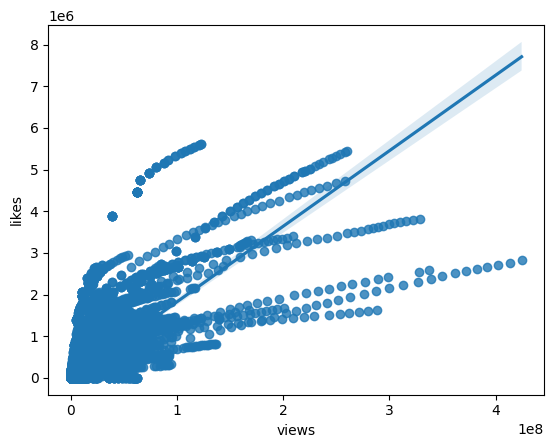

In [75]:
sns.regplot(data=csv_df,x='views',y='likes')

##### Finding co-relation between these three parameters

In [78]:
corelation = csv_df[['views','likes','dislikes']].corr()
corelation

,views,likes,dislikes
views,1.000000,0.777796,0.421653
likes,0.777796,1.000000,0.453710
dislikes,0.421653,0.453710,1.000000


##### Plotting heat map using Seaborn

<Axes: >

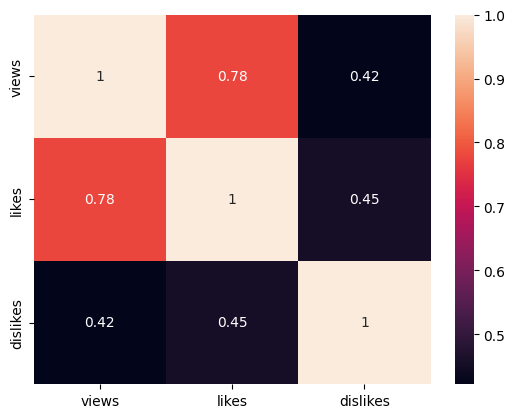

In [80]:
sns.heatmap(corelation,annot=True)

## `Analyzing Trending Videos`
```
To analyse these we have to fetch dataframe something kind of the following format:

Cat-1   10k likes
Cat-2   7k likes
..
..
```

In [81]:
csv_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,category_name
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA,Music
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA,Comedy
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,CA,Comedy
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,CA,Entertainment
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,CA,Music


`Lets try to group video_id and channel_title, so that we can find some relation`

In [93]:
(csv_df.groupby('channel_title')).count()

,video_id,trending_date,title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,category_name
channel_title,,,,,,,,,,,,,,,,,
! ì¸ìì ë¬´ì¨ì¼ì´,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
!!8æã ãé¢ç½ãã¿å¤§éå,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
!BTSã»TWICE ã¾ã¨ã,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1
!Los amorosos ViralesÂ¡,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
!t Live,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ï¼åã§ã§ãã DIY,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
ï¼¢ï¼¡ï¼³ï¼¨ï½ï½,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
ï¼«ã®ãã£ãã·ã³ã°ã¡ããã­ã,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


`Extract the video_id part and sort them`

In [107]:
grouped=(csv_df.groupby('channel_title')['video_id']).count().sort_values(ascending=False)
grouped

channel_title
The Late Show with Stephen Colbert    984
WWE                                   804
Late Night with Seth Meyers           773
VikatanTV                             763
TheEllenShow                          743
                                     ... 
LIGHTS - 001 jrny                       1
bangtanist                              1
LIGAMX Femenil                          1
LIGA COLOMBIANA OFICIAL                 1
Pavel Sidorik TV                        1
Name: video_id, Length: 37824, dtype: int64

`So, Lets change this to dataframe`

In [108]:
grouped=grouped.to_frame()
grouped

,video_id
channel_title,
The Late Show with Stephen Colbert,984
WWE,804
Late Night with Seth Meyers,773
VikatanTV,763
TheEllenShow,743
...,...
LIGHTS - 001 jrny,1
bangtanist,1
LIGAMX Femenil,1


`Resetting these index, and renaming, we get`

In [109]:
grouped=grouped.reset_index().rename(columns={'video_id':'total_videos'})
grouped

,channel_title,total_videos
0,The Late Show with Stephen Colbert,984
1,WWE,804
2,Late Night with Seth Meyers,773
3,VikatanTV,763
4,TheEllenShow,743
...,...,...
37819,LIGHTS - 001 jrny,1
37820,bangtanist,1
37821,LIGAMX Femenil,1
37822,LIGA COLOMBIANA OFICIAL,1


##### `Plotting Bar graph of top 20 (Trending) using plotly express`

In [114]:
px.bar(x='channel_title',y='total_videos',data_frame=grouped[0:20])

## `Does Punctuations have impact on views, likes and dislikes?`

`First, let us observe the punctuations in string module`

In [116]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

`Let us define a function which returns the punctuations in a string`

In [131]:
def punc_count(s):
    count=0
    for Char in s:
        if Char in string.punctuation:
            count+=1
    return count
punc_count('#$%^&*FHCnrudwjskncurwhb$&%*^')

11

`Insert Punctuation count field for each video of its title in out dataframe`

In [137]:
sample=csv_df[0:10000]
sample['punctuation_count']=sample['title'].apply(punc_count)
sample.head()

C:\Users\ravin\AppData\Local\Temp\ipykernel_19788\1201561845.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,category_name,punctuation_count
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA,Music,4
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA,Comedy,1
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,CA,Comedy,3
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,CA,Entertainment,3
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,CA,Music,3


##### `Let us plot the boxplot`

<Axes: xlabel='punctuation_count', ylabel='views'>

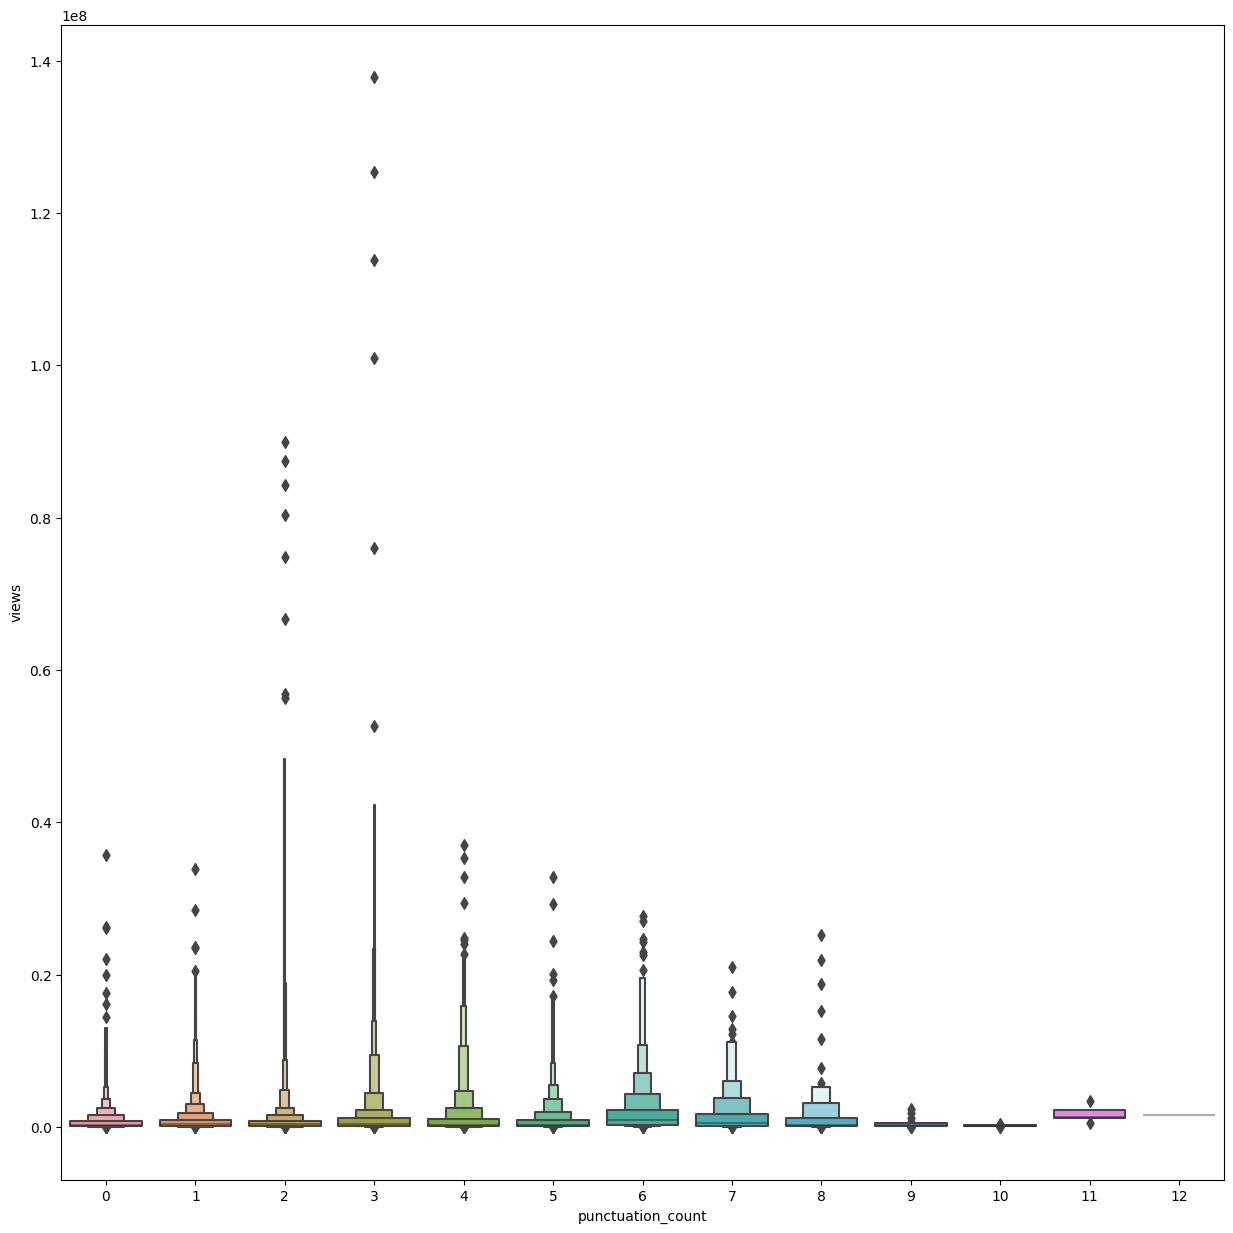

In [140]:
plt.figure(figsize=(15,15))
sns.boxenplot(data=sample,x='punctuation_count',y='views')

`Let us look at the corelation between punctuation and views`

In [141]:
sample['punctuation_count'].corr(sample['views'])

0.06510009783044858

`This means that there is ` **`7% probability`** `if the count of punctuation will get increase then there is the particular increase in views with respect to the particular video.`